In [57]:
### Pythonのバージョン確認
import sys
print(sys.version)

3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [58]:
import matplotlib.pyplot as plt
import math

# フィールドの初期化

In [59]:
### 障害物座標 (x, y) を保持する配列
obs_xs = []
obs_ys = []

max_x = 50
max_y = 50

### 下壁
for i in range(0, max_x):
    obs_xs.append(i)
    obs_ys.append(0)

### 上壁
for i in range(0, max_x):
    obs_xs.append(i)
    obs_ys.append(max_y-1)

### 左壁
for i in range(0, max_y):
    obs_xs.append(0)
    obs_ys.append(i)

### 右壁
for i in range(0, max_y):
    obs_xs.append(max_x-1)
    obs_ys.append(i)

### 障害物（縦線1）
for i in range(30, 41):
    obs_xs.append(10)
    obs_ys.append(i)

### 障害物（横線1）
for i in range(10, 31):
    obs_xs.append(i)
    obs_ys.append(30)

### 障害物（縦線2）
for i in range(20, 31):
    obs_xs.append(30)
    obs_ys.append(i)

### 障害物（横線2）
for i in range(30, 36):
    obs_xs.append(i)
    obs_ys.append(20)

print('obs_xs =', obs_xs)
print('obs_ys =', obs_ys)

obs_xs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 32, 33, 34, 35]
obs_ys = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [60]:
### スタート位置とゴール位置の座標 (x, y) を保持する変数
start_x, start_y = 10, 10
goal_x, goal_y = 40, 40

In [61]:
### フィールドを描画する関数
def DrawField(obs_xs, obs_ys, start_x, start_y, goal_x, goal_y):
    plt.scatter(obs_xs, obs_ys, marker='.', color='black')
    plt.scatter(start_x, start_y, marker='x', color='blue')
    plt.scatter(goal_x, goal_y, marker='x', color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.grid(True)

    return

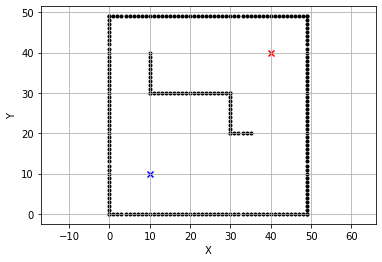

In [62]:
DrawField(obs_xs, obs_ys, start_x, start_y, goal_x, goal_y)

# 障害物マップとロボットのモーションモデルの作成

In [63]:
### 0なら障害物なし / 1なら障害物あり
NOT_OBS = 0
IS_OBS = 1

### ２次元配列の全マスをとりあえず「障害物なし」で初期化
obs_map = []
for v in range(max_y):
    obs_map_oneline = [NOT_OBS for u in range(max_x)] ### [NOT_OBS, NOT_OBS, NOT_OBS, ... , NOT_OBS]
    obs_map.append(obs_map_oneline)

print('len(obs_map) =', len(obs_map))
print('len(obs_map[0]) =', len(obs_map[0]))
print()

### 障害物の総数
assert len(obs_xs) == len(obs_ys)
num_obs = len(obs_xs)
print('num_obs =', num_obs)
print()

### 障害物がある座標は「障害物あり」に上書き
for i in range(num_obs):
    u = obs_xs[i]
    v = (max_y - 1) - obs_ys[i] ### 注：Y軸（上向き正 : 左下原点）とV軸（下向き正 : 左上原点）は上下反転する
    obs_map[v][u] = IS_OBS

### 画面に表示して動作確認
print('obs_map = [')
for v in range(max_y): 
    obs_map_oneline = obs_map[v]
    print('  ', obs_map_oneline)
print(']')

len(obs_map) = 50
len(obs_map[0]) = 50

num_obs = 249

obs_map = [
   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
   [1, 0,

In [64]:
'''
1.41  1  1.41
    ↖ ↑ ↗
 1  ← * → 1
    ↙ ↓ ↘
1.41  1  1.41
'''

### motion_dx, motion_dy, motion_cost
motion_model = [
    [ 1,  0, 1],
    [ 0,  1, 1],
    [-1,  0, 1],
    [ 0, -1, 1],
    [-1, -1, math.sqrt(2)],
    [-1,  1, math.sqrt(2)],
    [ 1, -1, math.sqrt(2)],
    [ 1,  1, math.sqrt(2)]
]

# 経路探索アルゴリズムに使うデータ構造や関数の準備

In [65]:
'''
(x, y) : 左下原点
[
    [(0,3), (1,3), (2,3), (3,3)],
    [(0,2), (1,2), (2,2), (3,2)],
    [(0,1), (1,1), (2,1), (3,1)],
    [(0,0), (1,0), (2,0), (3,0)]
]

↑
↓

(v, u) : 左上原点
[
    [(0,0), (0,1), (0,2), (0,3)],
    [(1,0), (1,1), (1,2), (1,3)],
    [(2,0), (2,1), (2,2), (2,3)],
    [(3,0), (3,1), (3,2), (3,3)]
]

↑
↓

id : 左上原点
[
    [ 0,  1,  2,  3],
    [ 4,  5,  6,  7],
    [ 8,  9, 10, 11],
    [12, 13, 14, 15],
]
'''

### (x, y) から ---> id に変換する関数
def XY2ID(x, y, max_x, max_y):
    u = x
    v = (max_y - 1) - y ### 注：Y軸（上向き正 : 左下原点）とV軸（下向き正 : 左上原点）は上下反転する
    id = v*max_x + u

    return id


In [66]:
### 画面に表示して動作確認
print('id =', XY2ID(x=0, y=3, max_x=4, max_y=4))
print('id =', XY2ID(x=0, y=2, max_x=4, max_y=4))
print('id =', XY2ID(x=0, y=1, max_x=4, max_y=4))
print('id =', XY2ID(x=0, y=0, max_x=4, max_y=4))

id = 0
id = 4
id = 8
id = 12


In [67]:
class Node:
    def __init__(self, x, y, cost, parent_id):
        self.x = x
        self.y = y
        self.cost = cost
        self.parent_id = parent_id

In [68]:
### ここがダイクストラ法とA*の違い
### ヒューリスティックコスト（今回は単に注目ノードからゴールノードまでの距離）を計算して返す関数
def CalcHeuristicCost(goal_node, open_node):
    dist_x = goal_node.x - open_node.x
    dist_y = goal_node.y - open_node.y
    heuristic_cost = math.sqrt(dist_x**2 + dist_y**2)

    return heuristic_cost

'''
open_nodes_dict = {
    0: Node(x0, y0, cost0, parent_id0),
    1: Node(x1, y1, cost1, parent_id1),
    2: Node(x2, y2, cost2, parent_id2),
    3: Node(x3, y3, cost3, parent_id3),
        :
        :
}
'''

### ここがダイクストラ法とA*の違い
### ノードリスト（辞書型）の中からヒューリスティックコスト込みでトータルコストが最小のノードを探してそのノードIDを返す関数
def FindMinTotalCostNodeID(open_nodes_dict, goal_node):
    min_total_cost = sys.float_info.max
    min_total_cost_node_id = None

    for id, open_node in open_nodes_dict.items():
        heuristic_cost = CalcHeuristicCost(goal_node, open_node)
        total_cost = open_node.cost + heuristic_cost

        if total_cost < min_total_cost:
            min_total_cost = total_cost
            min_total_cost_node_id = id

    return min_total_cost_node_id

In [69]:
def IsObsNode(obs_map, node, max_x, max_y):
    u = node.x
    v = (max_y - 1) - node.y ### 注：Y軸（上向き正 : 左下原点）とV軸（下向き正 : 左上原点）は上下反転する

    ### 注目ノードが障害物ノードならアウト
    if obs_map[v][u] == IS_OBS:
        return True

    ### 注目ノードがフィールド外ならアウト（念のため確認）
    if node.x < 0 or (max_x - 1) < node.x:
        return True
    if node.y < 0 or (max_y - 1) < node.y:
        return True

    ### どの条件にも引っ掛からなかったらセーフ
    return False

In [70]:
### オープンノードリストとクローズノードリストを描画する関数
### （コストが低いほど青に近い色　〜　コストが高いほど赤に近い色）
def DrawOpenAndCloseNodes(open_nodes_dict, close_nodes_dict, max_x, max_y):
    ### コストの値を 0~1 の間に正規化するために最大値（大体の値）を用意
    max_cost = math.sqrt(max_x**2 + max_y**2)

    for open_node in open_nodes_dict.values():
        if open_node.parent_id != None:
            norm_node_cost = open_node.cost/max_cost
            rgb = (norm_node_cost, 0, 1 - norm_node_cost) ### rgb = (0~1, 0, 0~1)
            plt.scatter(open_node.x, open_node.y, facecolors='none', edgecolors=rgb, s=20) ### オープンノードは○で描画

    for close_node in close_nodes_dict.values():
        if close_node.parent_id != None:
            norm_node_cost = close_node.cost/max_cost
            rgb = (norm_node_cost, 0, 1 - norm_node_cost) ### rgb = (0~1, 0, 0~1)
            plt.scatter(close_node.x, close_node.y, marker='o', color=rgb, s=20) ### クローズノードは●で描画

# A*による経路探索

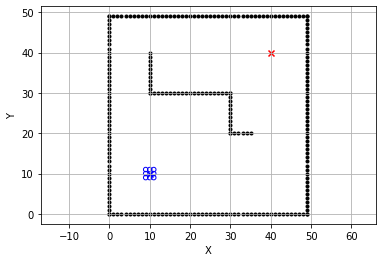

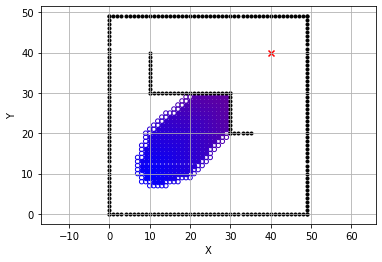

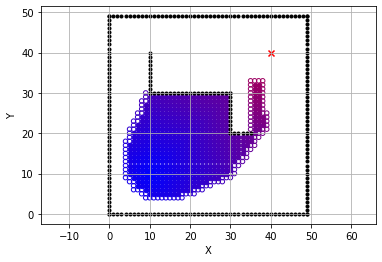

Goal !!! 

step = 690

len(open_nodes_dict) = 135
len(close_nodes_dict) = 690


In [71]:
### スタートノードとゴールノードを初期化
start_node = Node(start_x, start_y, cost=0.0, parent_id=None)
goal_node = Node(goal_x, goal_y, cost=0.0, parent_id=None)

### オープンノードリストとクローズノードリストを辞書型で初期化
open_nodes_dict = dict()
close_nodes_dict = dict()

### まず最初にオープンノードリストにスタートノードを追加
start_node_id = XY2ID(start_node.x, start_node.y, max_x, max_y)
open_nodes_dict[start_node_id] = start_node

### ゴールノードに到達まで繰り返し探索
step = 0
draw_step = 300
while True:
    ### オープンノードリストが空なら（残念ながら）ゴールまでの経路が発見できなかったということなので終了する
    if (len(open_nodes_dict) == 0):
        print('open_nodes_dict is empty...')
        break

    ### ここがダイクストラ法とA*の違い
    ### オープンノードリストの中でヒューリスティックコスト込みのトータルコストが最小のノードを現在ノードに設定
    curr_node_id = FindMinTotalCostNodeID(open_nodes_dict, goal_node)
    curr_node = open_nodes_dict[curr_node_id]

    ### ゴールノードに到達したら，ノード情報（コスト，親ノードID）を保存してi経路探索を終了する
    if curr_node.x == goal_node.x and curr_node.y == goal_node.y:
        print('Goal !!! \n')
        goal_node.cost = curr_node.cost
        goal_node.parent_id = curr_node.parent_id
        break

    ### 現在ノードをオープンノードリストから削除してクローズノードリストに追加
    del open_nodes_dict[curr_node_id]
    close_nodes_dict[curr_node_id] = curr_node

    ### 現在ノードの8近傍（8隣接）ノードをしらみ潰しに探索
    for motion_dx, motion_dy, motion_cost in motion_model:
        ### 隣接ノードとそのノードIDを設定
        neighbor_node = Node(
            curr_node.x + motion_dx,
            curr_node.y + motion_dy,
            cost = curr_node.cost + motion_cost,
            parent_id = curr_node_id
        )
        neighbor_node_id = XY2ID(neighbor_node.x, neighbor_node.y, max_x, max_y)

        ### もし隣接ノードが既にクローズノードリストの中にあるなら，もう再度探索はしない
        if neighbor_node_id in close_nodes_dict.keys():
            continue

        ### もし隣接ノードが障害物なら，探索しない
        if IsObsNode(obs_map, neighbor_node, max_x, max_y):
            continue

        ### もし隣接ノードがオープンノードリストの中にまだなければ，そのまま追加
        ### もし隣接ノードが既にオープンノードリストの中にあったとしてもコストが新たに下回るなら，上書き
        if neighbor_node_id not in open_nodes_dict.keys():
            open_nodes_dict[neighbor_node_id] = neighbor_node
        elif neighbor_node.cost < open_nodes_dict[neighbor_node_id].cost:
            open_nodes_dict[neighbor_node_id] = neighbor_node
    ### End of for

    ### 繰り返しのステップ数が draw_step 回ごとに探索の途中経過を描画
    if step % draw_step == 0:
        DrawOpenAndCloseNodes(open_nodes_dict, close_nodes_dict, max_x, max_y)
        DrawField(obs_xs, obs_ys, start_x, start_y, goal_x, goal_y)
        plt.pause(0.001)

    step += 1
### End of while

print('step =', step)
print()

print('len(open_nodes_dict) =', len(open_nodes_dict))
print('len(close_nodes_dict) =', len(close_nodes_dict))

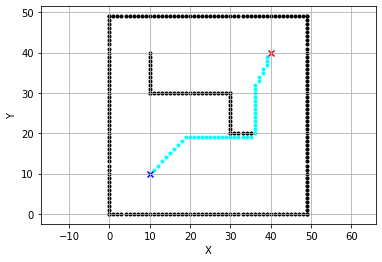

In [72]:
### 探索した最終経路の始まりはゴールノードから
path_x = [goal_node.x]
path_y = [goal_node.y]
next_node_id = goal_node.parent_id

### ゴールノードから親ノードIDを辿ってスタートノードに辿り着くまで（つまり next_node_id が None になるまで）繰り返し
while next_node_id != None:
    next_node = close_nodes_dict[next_node_id]
    path_x.append(next_node.x)
    path_y.append(next_node.y)
    next_node_id = next_node.parent_id

### 探索した最終経路とフィールドを描画
plt.scatter(path_x, path_y, marker='.', color='cyan')
DrawField(obs_xs, obs_ys, start_x, start_y, goal_x, goal_y)